In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import os
os.chdir('project')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [ ]:
TRAINING_DIR='dataset/'
training_datagen=ImageDataGenerator(
    featurewise_center=True, samplewise_center=True,
    featurewise_std_normalization=True, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, brightness_range=None, shear_range=0.4, zoom_range=0.4, fill_mode='nearest',
    horizontal_flip=True, vertical_flip=True, rescale=1./255, validation_split=0.2
)
train_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                     target_size=(128,128),
                                                     shuffle=True,
                                                     batch_size=128,
                                                     class_mode='categorical',
                                                     subset='training')
validation_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                          target_size=(128,128),
                                                          class_mode='categorical',
                                                          subset='validation')

Found 1986 images belonging to 2 classes.
Found 495 images belonging to 2 classes.


In [ ]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121,ResNet152V2,VGG19,InceptionV3,MobileNetV2
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

**ResNet CNN Model**

In [ ]:
model_d=ResNet152V2(weights='imagenet',include_top=False, input_shape=(128,128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer


234553344/234545216 [==============================] - 2s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 66, 66, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('Resnet_1.h5', verbose=1, save_best_only=True)

# Fits-the-model
history = model.fit_generator(train_generator,
               validation_data=validation_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint])

Epoch 1/50
16/16 [==============================] - 32s 1s/step - loss: 0.9454 - accuracy: 0.6752 - recall_2: 0.6752 - precision_2: 0.6752 - val_loss: 0.8396 - val_accuracy: 0.6606 - val_recall_2: 0.6606 - val_precision_2: 0.6606

Epoch 00001: val_loss improved from inf to 0.83963, saving model to Resnet_1.h5
Epoch 2/50
16/16 [==============================] - 22s 1s/step - loss: 0.7889 - accuracy: 0.7004 - recall_2: 0.7004 - precision_2: 0.7004 - val_loss: 0.9127 - val_accuracy: 0.6869 - val_recall_2: 0.6869 - val_precision_2: 0.6869

Epoch 00002: val_loss did not improve from 0.83963
Epoch 3/50
16/16 [==============================] - 21s 1s/step - loss: 0.7496 - accuracy: 0.7009 - recall_2: 0.7009 - precision_2: 0.7009 - val_loss: 0.6697 - val_accuracy: 0.7131 - val_recall_2: 0.7131 - val_precision_2: 0.7131

Epoch 00003: val_loss improved from 0.83963 to 0.66972, saving model to Resnet_1.h5
Epoch 4/50
16/16 [==============================] - 22s 1s/step - loss: 0.6818 - accuracy: 0

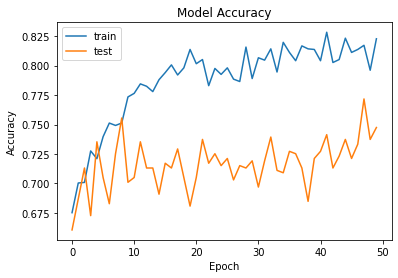

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

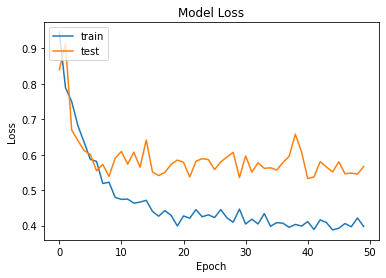

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('Resnet_1.npy',history.history)

**VGG19 CNN Model**

In [ ]:
model_d=VGG19(weights='imagenet',include_top=False, input_shape=(128,128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('VGG191.h5', verbose=1, save_best_only=True)

# Fits-the-model
history = model.fit_generator(train_generator,
               validation_data=validation_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint])

Epoch 1/50
16/16 [==============================] - 25s 2s/step - loss: 0.9650 - accuracy: 0.6727 - recall_1: 0.6727 - precision_1: 0.6727 - val_loss: 0.6535 - val_accuracy: 0.5737 - val_recall_1: 0.5737 - val_precision_1: 0.5737

Epoch 00001: val_loss improved from inf to 0.65350, saving model to VGG191.h5
Epoch 2/50
16/16 [==============================] - 20s 1s/step - loss: 0.8612 - accuracy: 0.6974 - recall_1: 0.6974 - precision_1: 0.6974 - val_loss: 0.6325 - val_accuracy: 0.6485 - val_recall_1: 0.6485 - val_precision_1: 0.6485

Epoch 00002: val_loss improved from 0.65350 to 0.63245, saving model to VGG191.h5
Epoch 3/50
16/16 [==============================] - 20s 1s/step - loss: 0.7288 - accuracy: 0.7120 - recall_1: 0.7120 - precision_1: 0.7120 - val_loss: 0.7407 - val_accuracy: 0.5051 - val_recall_1: 0.5051 - val_precision_1: 0.5051

Epoch 00003: val_loss did not improve from 0.63245
Epoch 4/50
16/16 [==============================] - 20s 1s/step - loss: 0.6462 - accuracy: 0.742

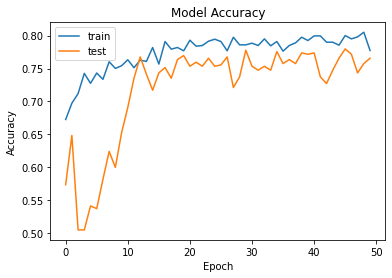

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

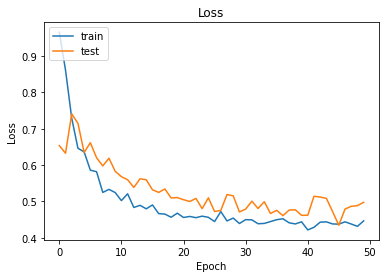

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('sagar_VGG.npy',history.history)

**Inception CNN Model**

In [ ]:
model_d=InceptionV3(weights='imagenet',include_top=False, input_shape=(128,128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization_6[0][0]      
____________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('InceptionV3.h5', verbose=1, save_best_only=True)

# Fits-the-model
history = model.fit_generator(train_generator,
               validation_data=validation_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint])

Epoch 1/50
16/16 [==============================] - 28s 1s/step - loss: 1.1700 - accuracy: 0.6395 - recall_3: 0.6395 - precision_3: 0.6395 - val_loss: 0.9843 - val_accuracy: 0.6626 - val_recall_3: 0.6626 - val_precision_3: 0.6626

Epoch 00001: val_loss improved from inf to 0.98430, saving model to InceptionV3.h5
Epoch 2/50
16/16 [==============================] - 20s 1s/step - loss: 0.9335 - accuracy: 0.6692 - recall_3: 0.6692 - precision_3: 0.6692 - val_loss: 0.8709 - val_accuracy: 0.6929 - val_recall_3: 0.6929 - val_precision_3: 0.6929

Epoch 00002: val_loss improved from 0.98430 to 0.87086, saving model to InceptionV3.h5
Epoch 3/50
16/16 [==============================] - 20s 1s/step - loss: 0.7727 - accuracy: 0.6762 - recall_3: 0.6762 - precision_3: 0.6762 - val_loss: 0.7336 - val_accuracy: 0.6889 - val_recall_3: 0.6889 - val_precision_3: 0.6889

Epoch 00003: val_loss improved from 0.87086 to 0.73364, saving model to InceptionV3.h5
Epoch 4/50
16/16 [==============================] 

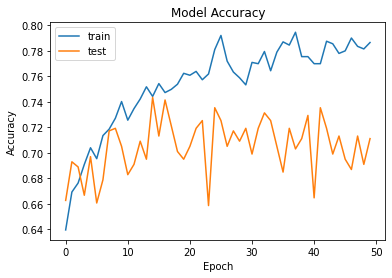

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

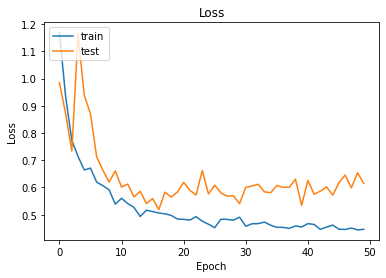

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('Inception.npy',history.history)